In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Decision Tree
Explanation of each column:

age: Age of the patient in years.

sex: Gender of the patient (0 for female, 1 for male).

cp: Chest pain type. This column likely represents different categories or levels of chest pain experienced by the patient, which might be measured on an ordinal scale.

trestbps: Resting blood pressure (in mm Hg) measured at admission to the hospital.

chol: Serum cholesterol level (in mg/dl) at admission to the hospital.

fbs: Fasting blood sugar level. This column likely indicates whether the patient had a fasting blood sugar level higher than 120 mg/dl (1 for yes, 0 for no).

restecg: Resting electrocardiographic results. This column may represent different categories or levels of resting ECG results.

thalach: Maximum heart rate achieved during the exercise test.

exang: Exercise-induced angina (1 for yes, 0 for no). It indicates whether the patient experienced angina (chest pain or discomfort) during exercise.

oldpeak: ST depression induced by exercise relative to rest. This is a measure of how much the ST segment of the ECG changes during exercise compared to rest.

slope: The slope of the peak exercise ST segment. This likely represents different categories or levels of the slope of ST segment changes during exercise.

ca: The number of major vessels (0-3) colored by fluoroscopy. This is often used as a measure of the number of blood vessels with significant narrowing.

thal: A blood disorder called thalassemia (a categorical variable with different levels).

target: The target variable or the outcome you're trying to predict. In the context of heart disease prediction, this column typically indicates whether a patient has heart disease (1 for yes, 0 for no).

In [6]:
path="/content/drive/MyDrive/Colab Notebooks/dataset/heart.csv"
df=pd.read_csv(path)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


eda

In [8]:
df.shape

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


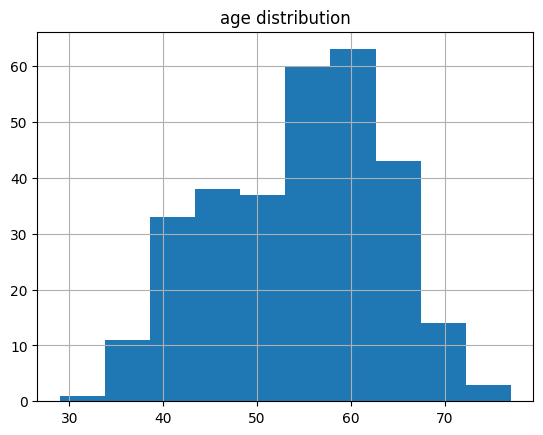

In [10]:
# distribution
df['age'].hist()
plt.title('age distribution')
plt.show()

<ipython-input-11-1203472f270a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='male')
<ipython-input-11-1203472f270a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],label='female')


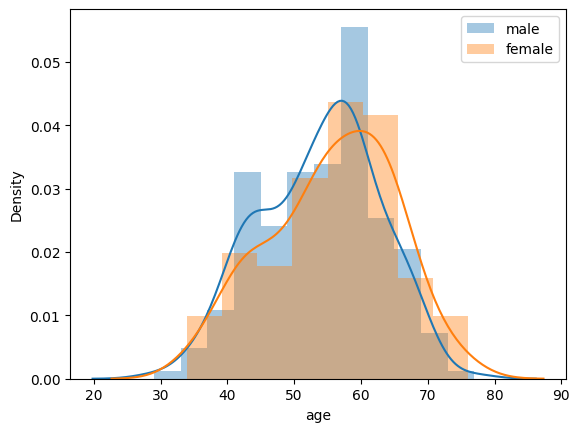

In [11]:
sns.distplot(df[df['sex']==1]['age'],label='male')
sns.distplot(df[df['sex']==0]['age'],label='female')
plt.legend()

In [12]:
df['sex']==1

0       True
1       True
2      False
3       True
4      False
       ...  
298    False
299     True
300     True
301     True
302    False
Name: sex, Length: 303, dtype: bool

In [13]:
df[df['sex']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [15]:
import plotly.express as px

In [16]:
fig=px.histogram(df,x='age',nbins=10,title='age distribution')
fig.show()

<ipython-input-17-eceab82cdd6b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-17-eceab82cdd6b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




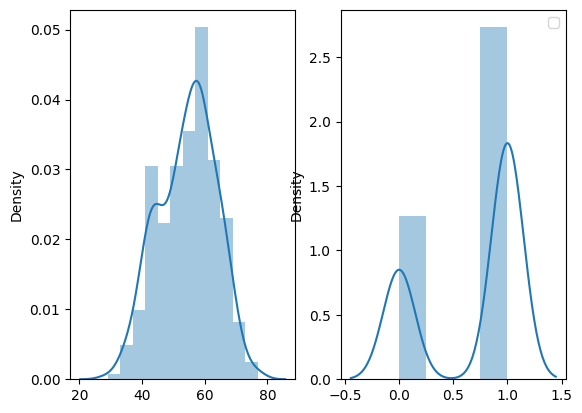

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.distplot(x=df['age'],ax=axes[0])
sns.distplot(x=df['sex'], ax=axes[1])
plt.legend()

<ipython-input-18-28d87afd695a>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-18-28d87afd695a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




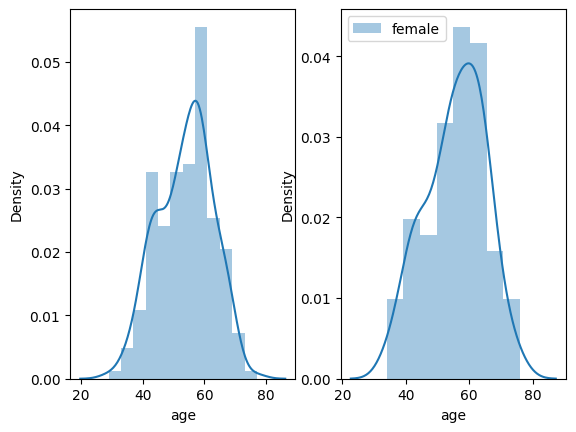

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2)
sns.distplot(df[df['sex']==1]['age'], label ='male', ax=axes[0])
sns.distplot(df[df['sex']==0]['age'], label ='female', ax=axes[1])
plt.legend()
plt.show()